In [1]:
from nbodykit.lab import *
import numpy as np
import dask.array as da
import matplotlib.pyplot as plt

import sys
sys.path.append('../general_routines/')
from general_tools import *
from iterative_reconstruction import *

In [3]:
cosmo = cosmology.Planck15

### Import matter catalog
matter = BigFileCatalog('Matter_catalog.bigfile')

# Define global variables
Length = matter.attrs['BoxSize'][0]
Nc = matter.attrs['Nmesh'][0]
zobs = 0.3
zinit = 3.
r_s = 2.*(Length/Nc) # smoothing radius
print('Smoothing radius=', r_s)

### Import galaxy catalog
galaxy = BigFileCatalog('Galaxy_catalog.bigfile')

bg, bg_std = evaluate_bias(galaxy, matter, return_std=True)
bgRSD, bgRSD_std = evaluate_bias(galaxy, matter, tracer_pos='PositionRSD', return_std=True)

print('bias (real) PRE= {:.3f} +- {:.3f}'.format(bg, bg_std))
print('bias (redshift) PRE= {:.3f} +- {:.3f}'.format(bgRSD, bgRSD_std))

Smoothing radius= 7.8125
bias (real) PRE= 1.423 +- 0.020
bias (redshift) PRE= 1.653 +- 0.023


In [4]:
# Valores de formulas (real)
breczinitt = (bg-1)*(D(zobs)/D(zinit)) + 1
breczobst = (bg-1) + (D(zinit)/D(zobs))
print('From real space bias')
print('Expected bias brec(zinit) = {:.3f}'.format(breczinitt))
print('Expected bias brec(zobs) = {:.3f}'.format(breczobst))

# Valores de formulas (redshift)
print('From redshift space bias')
breczinitt = (bgRSD-1)*(D(zobs)/D(zinit)) + 1
breczobst = (bgRSD-1) + (D(zinit)/D(zobs))

print('Expected bias brec(zinit) = {:.3f}'.format(breczinitt))
print('Expected bias brec(zobs) = {:.3f}'.format(breczobst))

From real space bias
Expected bias brec(zinit) = 2.140
Expected bias brec(zobs) = 0.794
From redshift space bias
Expected bias brec(zinit) = 2.761
Expected bias brec(zobs) = 1.024


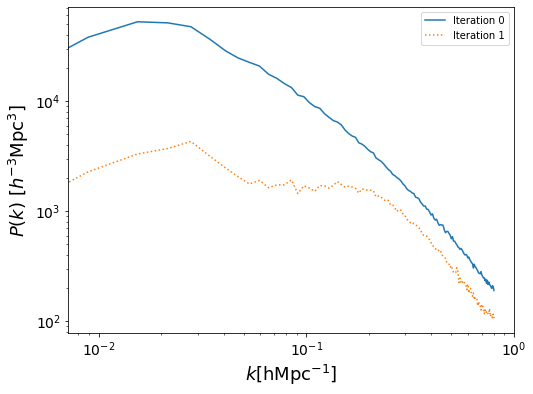

Iteration 1, Mean difference between Pks: 3775.01


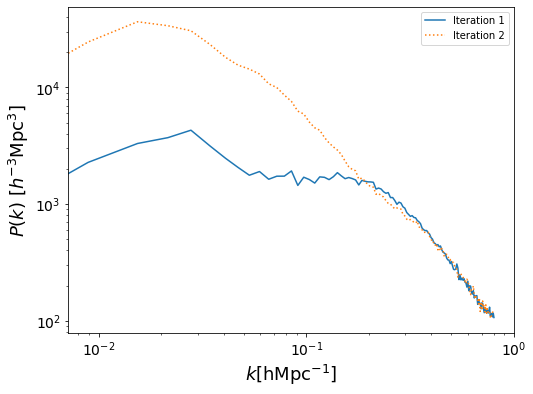

Iteration 2, Mean difference between Pks: 1922.53


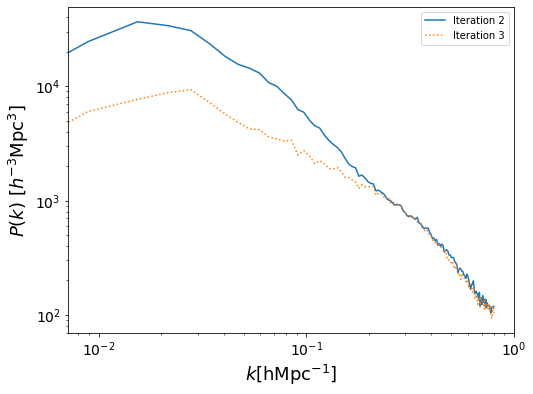

Iteration 3, Mean difference between Pks: 1569.87


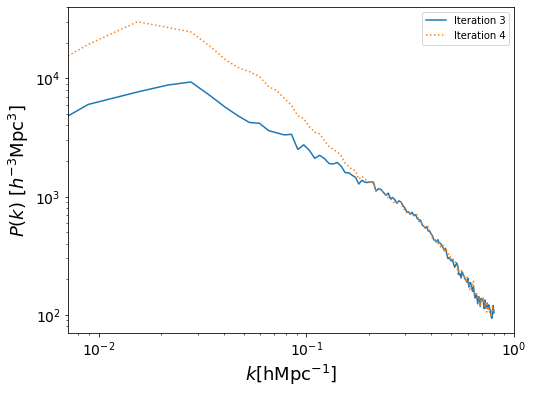

Iteration 4, Mean difference between Pks: 1091.04


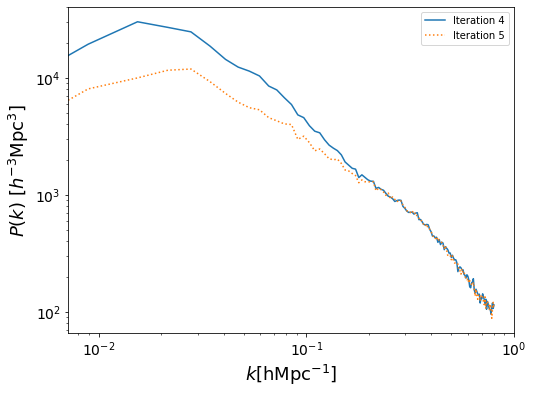

Iteration 5, Mean difference between Pks: 912.36


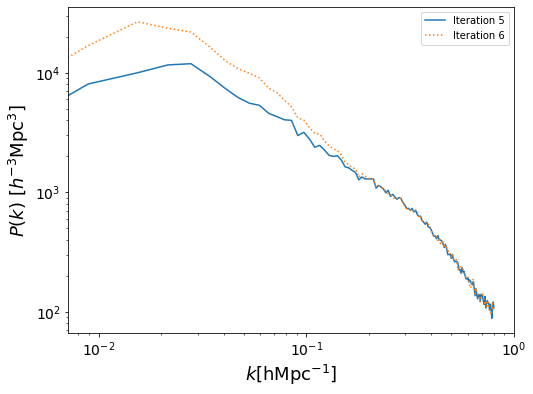

Iteration 6, Mean difference between Pks: 689.02


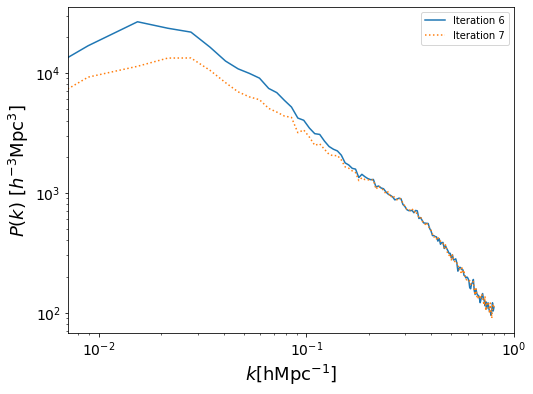

Iteration 7, Mean difference between Pks: 593.07


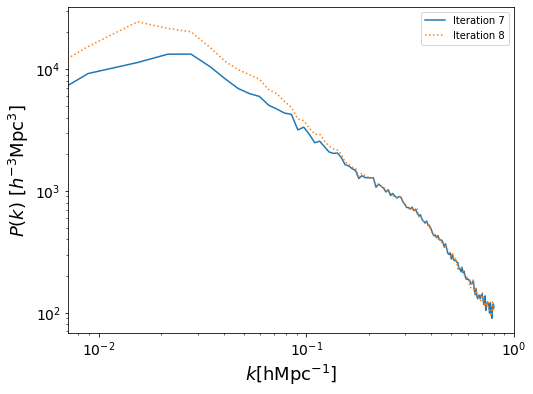

Iteration 8, Mean difference between Pks: 470.74


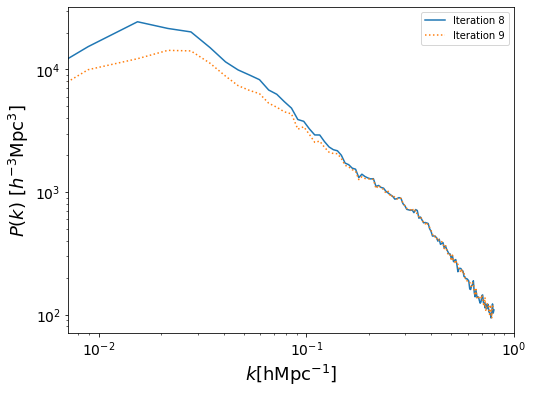

Iteration 9, Mean difference between Pks: 413.72


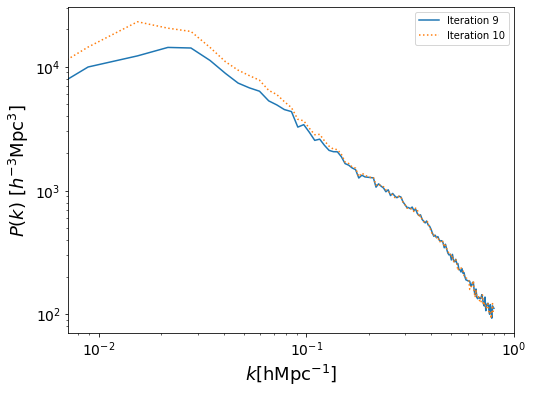

Iteration 10, Mean difference between Pks: 341.18


In [13]:
# From redshift position
iterative_reconstruction(10, Length, Nc, zobs, zinit, galaxy, matter, np.array([Length/2, Length/2, Length/2]), plot_iterations=True)

In [9]:
# Bias in real space
bgreconr2 = evaluate_bias(galaxy, matter, tracer_pos='PositionQ')
bgreconr1 = bgreconr2 * D(zobs)/D(zinit)

print('bias (real) POST= {:.3f}(z={:.2f}),{:.3f}(z={:.2f})'.format(bgreconr1, zinit,bgreconr2, zobs))

# Bias in redshift space
bgrecons2 = evaluate_bias(galaxy, matter, tracer_pos='PositionQS')
bgrecons1 = bgrecons2 * D(zobs)/D(zinit)

print('bias (redshift) POST= {:.3f}(z={:.2f}),{:.3f}(z={:.2f})'.format(bgrecons1, zinit,bgrecons2, zobs))

bias (real) POST= 2.288(z=3.00),0.849(z=0.30)
bias (redshift) POST= 3.610(z=3.00),1.339(z=0.30)


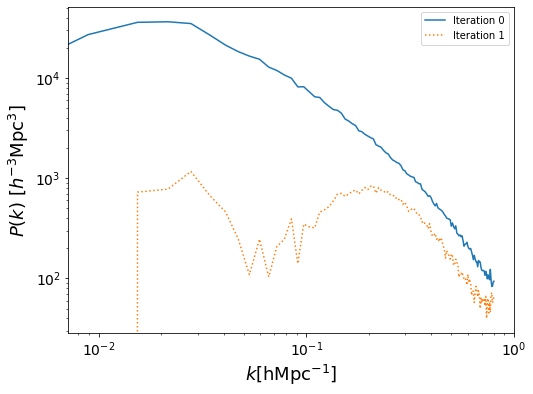

Iteration 1, Mean difference between Pks: 2984.49


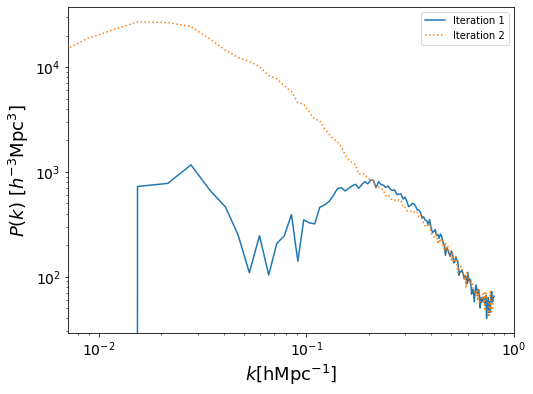

Iteration 2, Mean difference between Pks: 1707.20


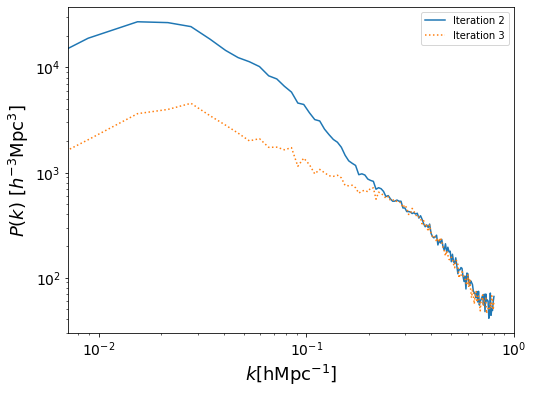

Iteration 3, Mean difference between Pks: 1432.02


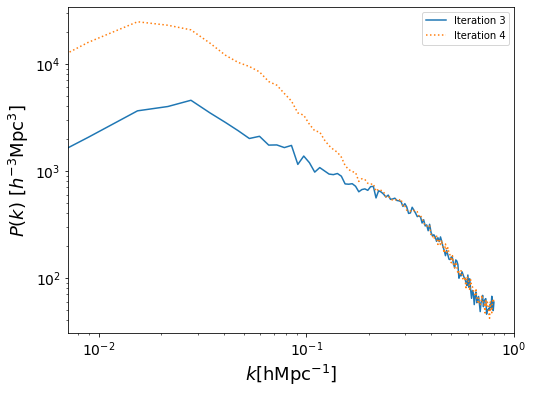

Iteration 4, Mean difference between Pks: 1122.23


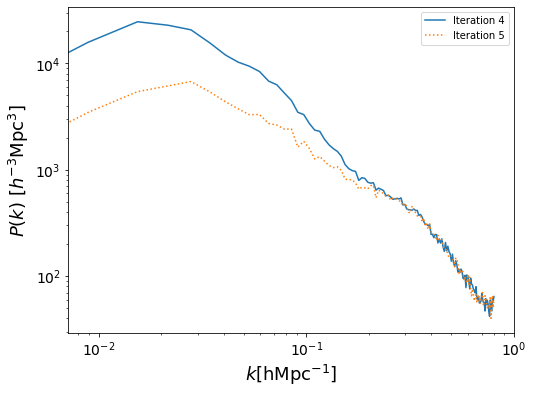

Iteration 5, Mean difference between Pks: 957.67


In [11]:
# From real space position
iterative_reconstruction(5, Length, Nc, zobs, zinit, galaxy, matter, np.array([Length/2, Length/2, Length/2]), real_space=True, plot_iterations=True)

In [12]:
# Bias in real space
bgreconr2 = evaluate_bias(galaxy, matter, tracer_pos='PositionQ')
bgreconr1 = bgreconr2 * D(zobs)/D(zinit)

print('bias (real) POST= {:.2f}(z={:.2f}),{:.2f}(z={:.2f})'.format(bgreconr1, zinit,bgreconr2, zobs))

# Bias in redshift space
bgrecons2 = evaluate_bias(galaxy, matter, tracer_pos='PositionQS')
bgrecons1 = bgrecons2 * D(zobs)/D(zinit)

print('bias (redshift) POST= {:.2f}(z={:.2f}),{:.2f}(z={:.2f})'.format(bgrecons1, zinit,bgrecons2, zobs))

bias (real) POST= 1.77(z=3.00),0.66(z=0.30)
bias (redshift) POST= 2.91(z=3.00),1.08(z=0.30)
